# TFT Simulation
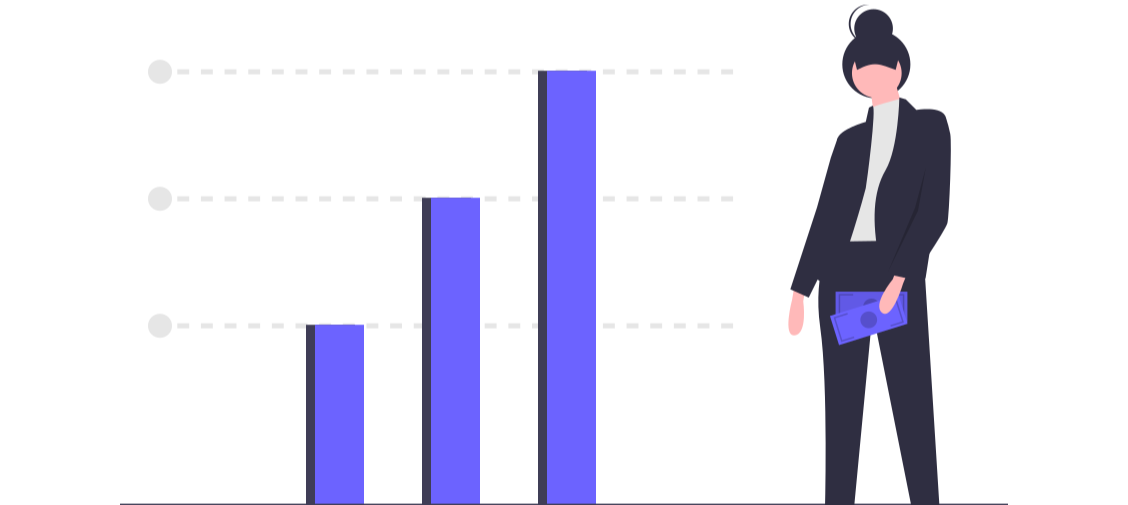

In [ ]:
## Simulation Arguments 

In [2]:
from lib import *
simulation = j.tools.tfgrid_simulator.simulation_get(name="default", hardware_config_name="amd", reload=True)
server = simulation.environment.node_normalized

 - tft_price_5y: 3.0
 - node_growth: 0:5,6:150,12:1000,18:2000,24:8000,36:12000,48:20000,60:20000
 - price_cu: 15.0
 - price_su: 10.0
 - price_nu: 0.05


In [3]:
md(f"""

- nr of nodes at start: {simulation.nodebatches[0].nrnodes}
- nr of months left (avg out) for farming of startingnodes: {simulation.nodebatches[0].months_left}
- nr of TFT already farmed: { j.data.types.numeric.clean(simulation.nodebatches[0].tft_farmed_before_simulation)} 

""")



- nr of nodes at start: 1500
- nr of months left (avg out) for farming of startingnodes: 36
- nr of TFT already farmed: 800,000,000 



## Device Details

In [10]:

md(f"""
### Device Details

- nr of TB netto usable = {round(server.production.su,1)} TB
- nr of cpu cores = {round(server.production.cru,1)} Cores
- power used = {server.total.power} watt
- performance in passmark = {round(server.production.cu_passmark*server.production.cu)}

""")


### Device Details

- nr of TB netto usable = 58.3 TB
- nr of cpu cores = 16 Cores
- power used = 232 watt
- performance in passmark = 24479



## Growth per month

In [11]:
simulation.graph_nr_nodes()

FigureWidget({
    'data': [{'name': 'new nodes',
              'type': 'scatter',
              'uid': '37c94…

### Number of racks per month


In [12]:
x=np.arange(0,60)
cells= [int(i/44) for i in simulation.sheet.rows.rackspace_u.cells[0:60]]
fig = go.FigureWidget(data=go.Scatter(x=x, y=cells))
fig.update_layout(title = 'Racks Occupied per Month',showlegend=False)
# fig

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '07a4f8d7-3a6e-4a53-94c3-aa666ead1e0a',
 …

In [13]:
cells= [int(i) for i in simulation.sheet.rows.power_kw.cells[0:60]]
fig = go.FigureWidget(data=go.Scatter(x=x, y=cells))
fig.update_layout(title = 'Kwatt/h per Month used.',showlegend=False)
fig

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '7230f064-5095-4309-a302-34d4e24d363c',
 …

## TFT Growth

In [14]:
names=["farmed","cultivated","sold","burned","farmer_income"]
def do(end):
    fig = go.FigureWidget()
    title = 'TFT Farmed, Cultivated, Sold, Burned per month, for batch month:%s.'%end
    xx=[i for i in range(1,end+1)]
    for i in range(5):
        name=names[i]
        cells=simulation.rows["tft_%s"%name].cells[1:end+1]
        fig.add_trace(go.Scatter(x=xx, y=cells,name=name))
    fig.update_layout(title = title,showlegend=True)
    return fig


In [15]:
do(12)

FigureWidget({
    'data': [{'name': 'farmed',
              'type': 'scatter',
              'uid': '293bf79b…

In [16]:
do(30)

FigureWidget({
    'data': [{'name': 'farmed',
              'type': 'scatter',
              'uid': 'd22f3b72…

In [17]:
do(60)

FigureWidget({
    'data': [{'name': 'farmed',
              'type': 'scatter',
              'uid': '3cf2a21e…

In [18]:
fig_nrnodes, fig_tft_movement, fig_nrtokens, fig_grid_valuation, fig_tft_marketcap=simulation.graph_tft_simulation(show=False);

In [19]:
fig_nrnodes

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'nrnodes_total',
              'type'…

In [20]:
fig_tft_movement

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'tft_farmed',
              'type': '…

In [21]:
fig_nrtokens

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'tft_farmed_cumul',
              'ty…

In [22]:
fig_tft_marketcap

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'tft_marketcap',
              'type'…

In [23]:
fig_grid_valuation


FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'USD',
              'type': 'scatter…

## Token price per month


In [24]:
simulation.graph_token_price()


FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '3417260a-5f10-4da8-9e74-7d05ae9813c7',
 …

# Details

- parameters used:

In [25]:
j.tools.tfgrid_simulator.simulator_config


## threefold.simulation.config
 - name                : default
 - tft_pricing_type    : FIXED
 - tft_price_5y        : 3.00
 - node_growth         : 600,000
 - startmonth          : 1
 - hardwareconfig      : A_dc_rack

    ## threefold.simulation.pricing
     - price_cu            : 15.00
     - price_su            : 10.00
     - price_nu            : 0.05
    


    ## threefold.simulation.tokenomics
     - cpr_investment_usd  : 30
     - burn_percent        : 0
    


    ## threefold.simulation.network
     - nu_multiplier_from_cu: 10
     - nu_multiplier_from_su: 40
    


    ## threefold.simulation.cloudvaluation.config
     - price_cu            : 15.00
     - price_su            : 10.00
     - price_nu            : 0.05
     - revenue_months      : 30
     - margin_months       : 60
     - indextype           : REVENUE
     - tft_price_5y_baseline: 4
    

